# Modelo de machine learning - Hiper-parametros

Os recursos são calculados a partir de uma imagem digitalizada de um aspirado por agulha fina (FNA) de uma massa mamária. Eles descrevem as características dos núcleos celulares presentes na imagem.

**Informações de atributo**

1) ID número

2) Diagnóstico (M = maligno, B = benigno)

3-32)

**Dez recursos de valor real são calculados para cada núcleo da célula:**

a) raio (média das distâncias do centro aos pontos no perímetro)

b) textura (desvio padrão dos valores da escala de cinza)

c) perímetro

d) área

e) suavidade (variação local nos comprimentos dos raios)

f) compacidade (perímetro ^ 2 / área - 1,0)

g) concavidade (severidade das porções côncavas do contorno)

h) pontos côncavos (número de porções côncavas do contorno)

i) simetria

j) dimensão fractal ("aproximação da linha costeira" - 1)

A média, o erro padrão e o "pior" ou maior (média dos três
maiores valores) desses recursos foram calculados para cada imagem,
resultando em 30 recursos. Por exemplo, o campo 3 é o raio médio, o campo
13 é o raio SE, o campo 23 é o pior raio.

Todos os valores de recursos são recodificados com quatro dígitos significativos.

Valores de atributo ausentes: nenhum

Distribuição de classes: 357 benignos, 212 malignos

**Objetivo do modelo machine learning prevêr pessoas com câncer para benignos e malignos**

**Análise de dados**

Sobe os dados câncer quanto tem mais para malignos e benignos.

**Modelo de machine learning**

Eu usei três algoritmos de machine learning como regressão logistica, e modelo de validação cruzada, dummy classifier, decision tree classifier para o dados.
Utilizei modelos de hiperparametros para modelo de decision tree que teve um overfitting de 100% nós dados de treino utlizei o GridSearchCV, RandomizedSearchCV que teve uma acurácia boa de 93.66% no GridSearchCV e 92.25 teve RandomizedSearchCV. Ou seja o hiperparametro com decision tree melhorou muito no dataset.

**Resultados do modelos**

No algoritmos de dummy classifier, regressão logistica, decision tree classifier, tive resultado para os casos de malignos, benignos.

**Dummy classifier**

187 - para os casos de malignos.

98 - para os casos de benignos.

**Regressão logistica**

187 - para os casos de malignos

98 - para os casos de benignos

**Resultados do modelo do Decision tree classifier - Com overfitting**

187 - para os casos de malignos

98 - para os casos de benignos

**Decision tree classifier - Hiperparametros - GridSearchCV**

170 - para os casos de malignos

114 - para os casos de benignos

**Decision tree classifier - Hiperparametros - RandomizedSearchCV**

170 - para os casos de malignos

121 - para os casos de benignos

In [1]:
from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.7.4


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore")

In [3]:
%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

seaborn   : 0.9.0
numpy     : 1.16.5
matplotlib: 3.1.1
pandas    : 1.1.3



In [4]:
sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.5)
color = sns.color_palette()

In [5]:
df = pd.read_csv("data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [8]:
df.shape

(569, 33)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
df.groupby(['diagnosis'])['diagnosis'].count()

diagnosis
B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [14]:
corr = df.corr()
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


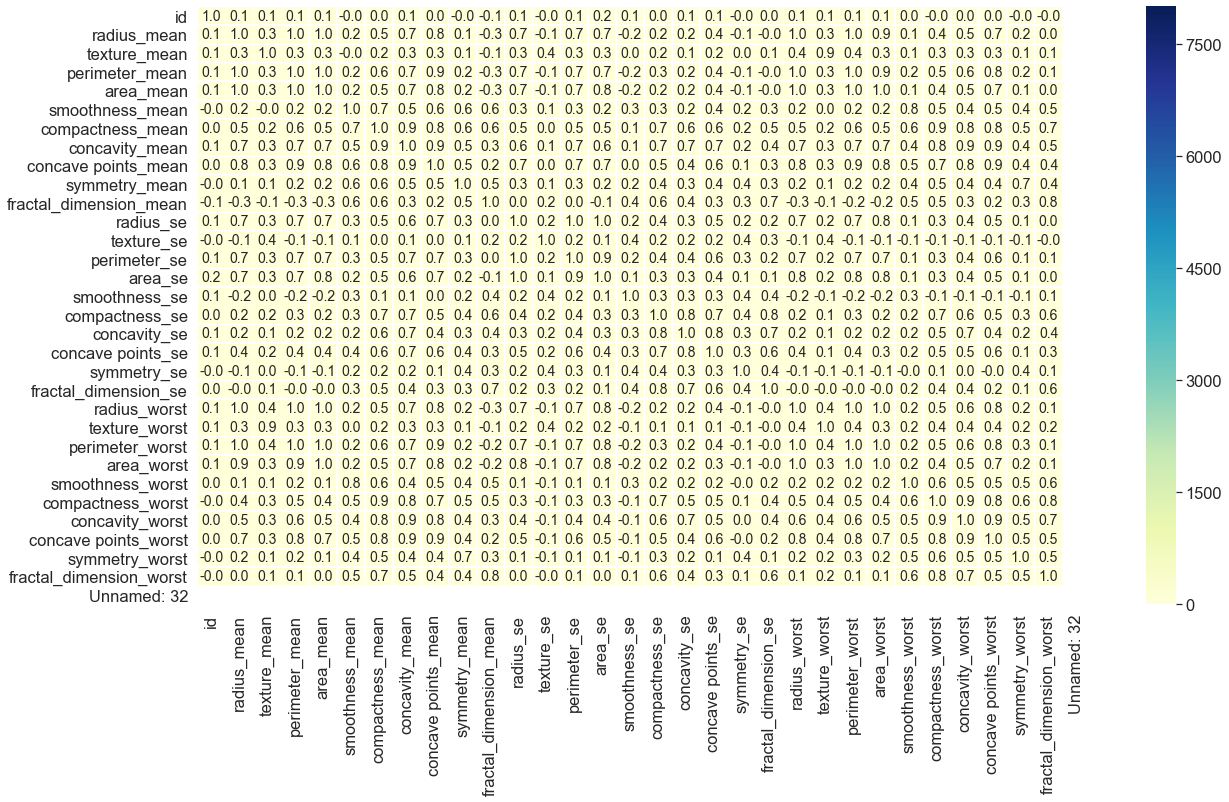

In [15]:
plt.figure(figsize=(20,11))

ax = sns.heatmap(corr, vmin=0, vmax=8000, cmap="YlGnBu", linewidths=.5, annot=True ,annot_kws={'size':14} ,fmt=".1f")
plt.yticks(rotation=0)
plt.show()

# Análise de dados

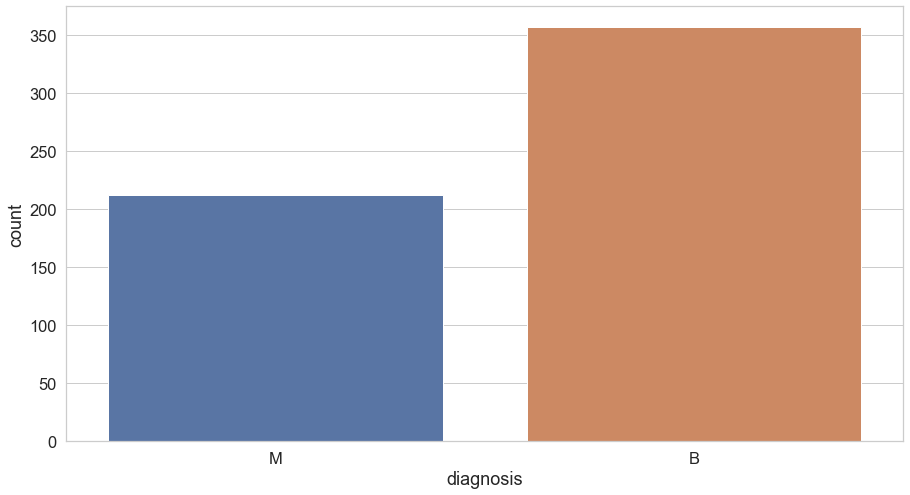

In [16]:
plt.figure(figsize=(15, 8))

ax = sns.countplot(df["diagnosis"])

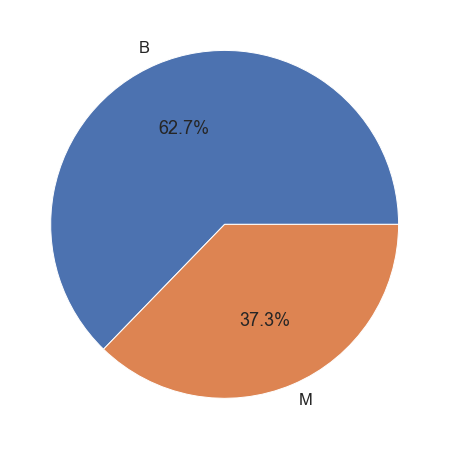

In [17]:
plt.figure(figsize=(15, 8))

plt.pie(df.groupby('diagnosis')['diagnosis'].count(), labels=['B','M'], autopct='%1.1f%%');

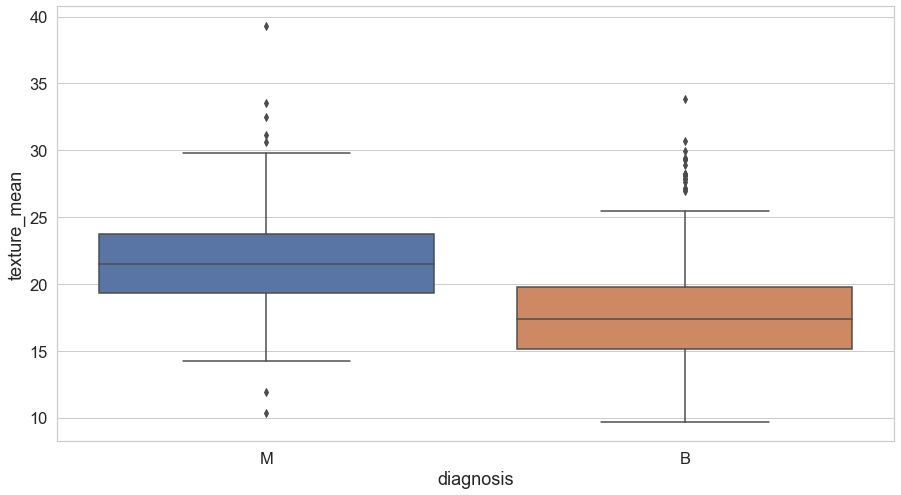

In [18]:
plt.figure(figsize=(15, 8))

ax = sns.boxplot(x="diagnosis", y = "texture_mean", data = df)

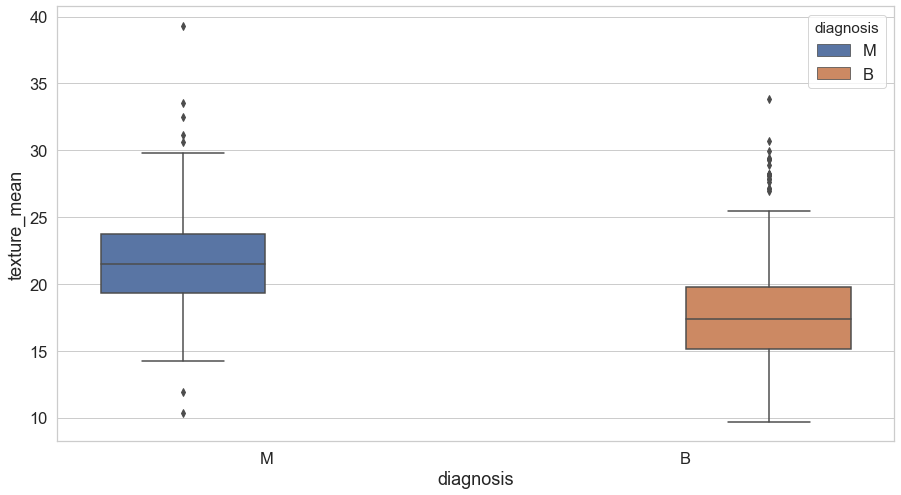

In [19]:
plt.figure(figsize=(15, 8))

ax = sns.boxplot(x="diagnosis", y = "texture_mean", data = df, hue ="diagnosis")

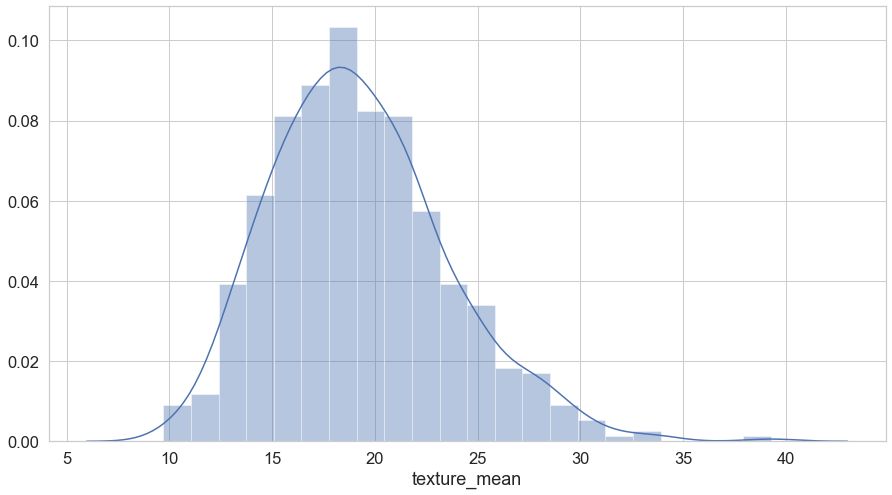

In [20]:
plt.figure(figsize=(15, 8))

ax = sns.distplot(df["texture_mean"])

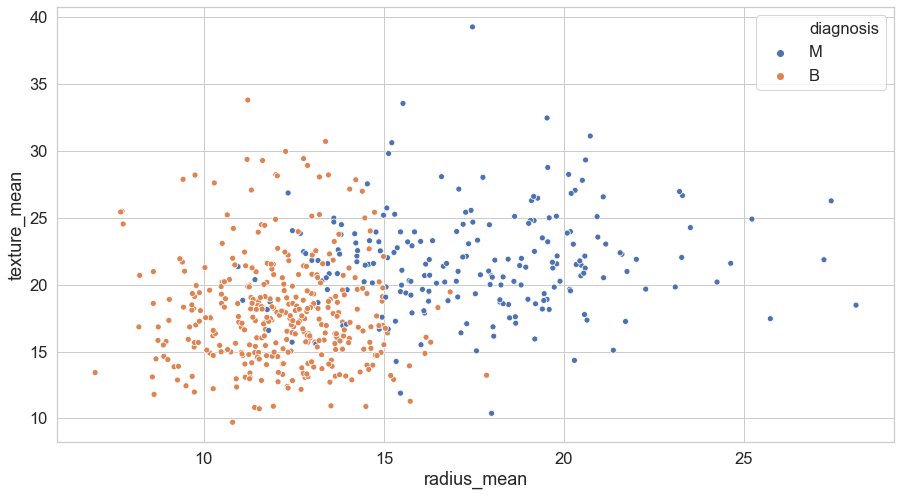

In [21]:
plt.figure(figsize=(15, 8))

sns.scatterplot(x="radius_mean", y="texture_mean", hue="diagnosis", data = df)

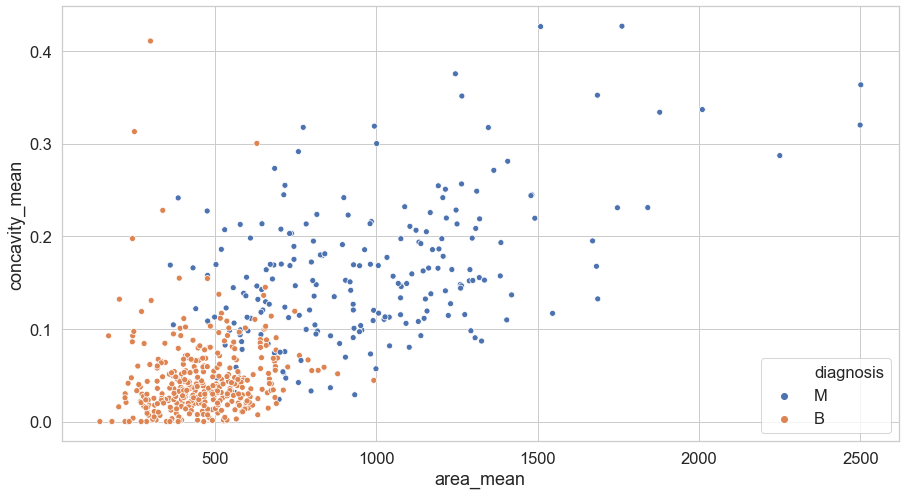

In [22]:
plt.figure(figsize=(15, 8))

sns.scatterplot(x="area_mean", y="concavity_mean", hue="diagnosis", data = df)

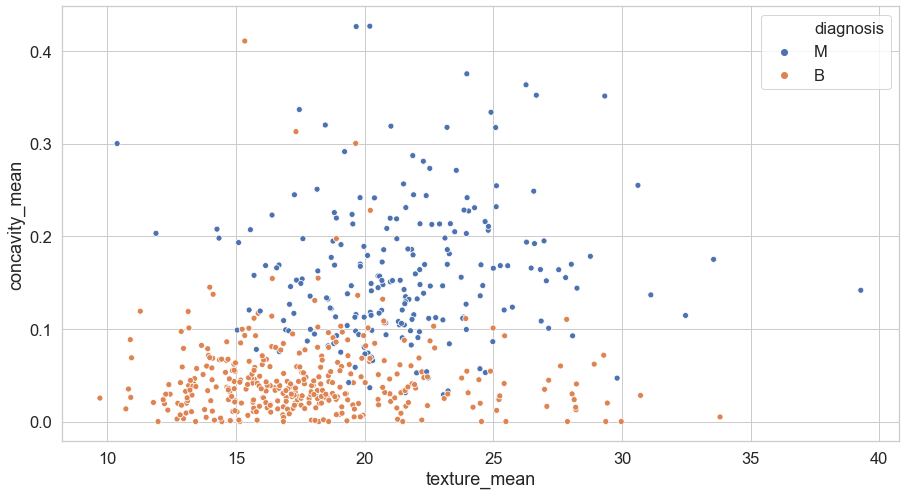

In [23]:
plt.figure(figsize=(15, 8))

ax = sns.scatterplot(x="texture_mean", y="concavity_mean", hue="diagnosis", data = df)

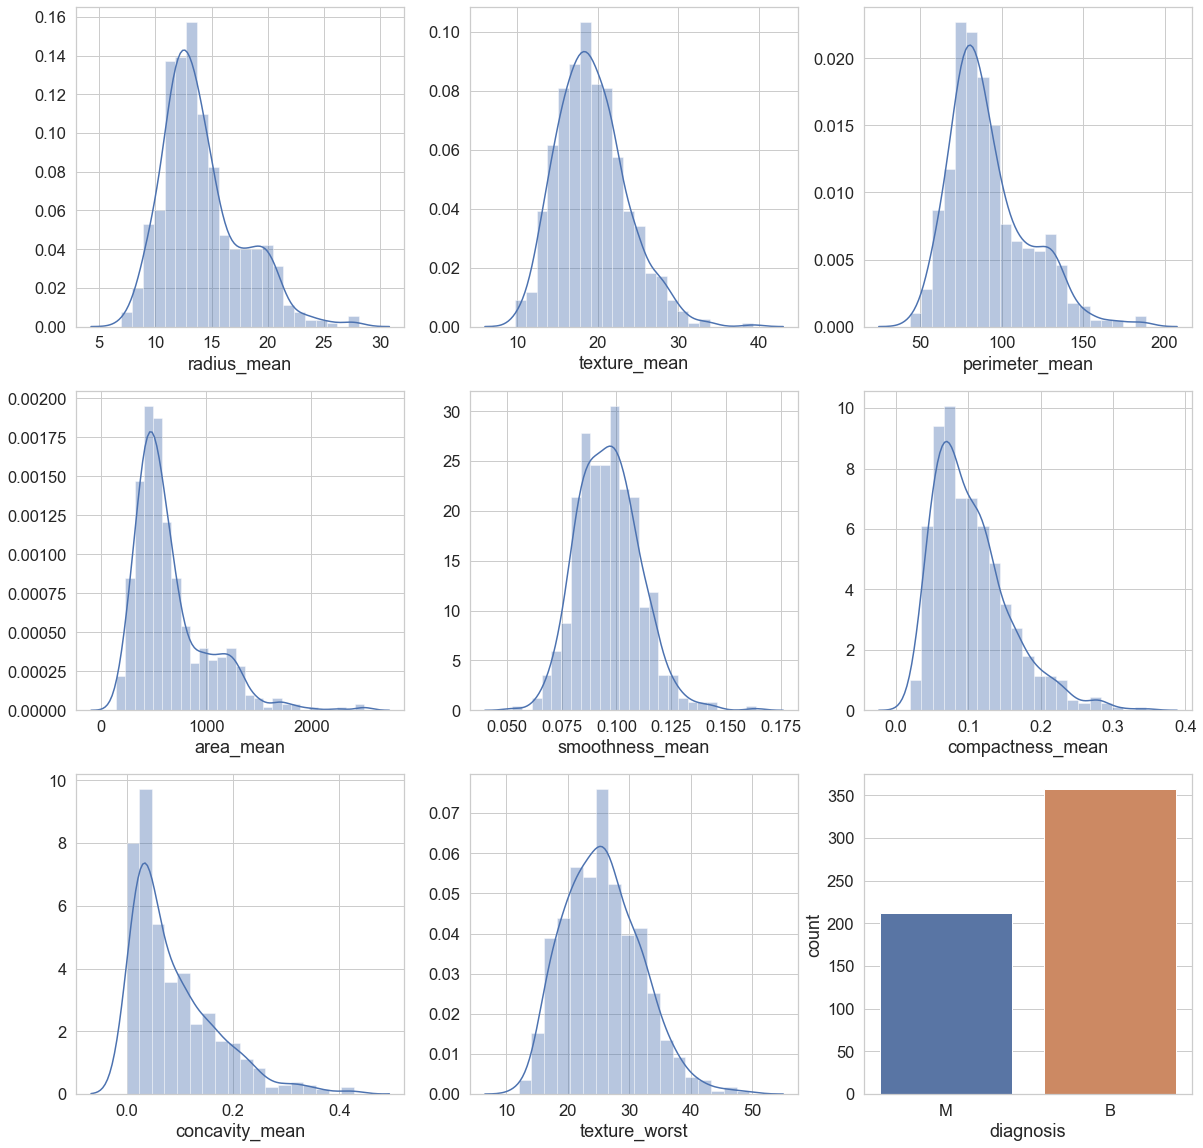

In [24]:
fig1 , axes = plt.subplots(nrows=3,ncols=3 , figsize = (20,20))

sns.distplot(df["radius_mean"] , ax=axes[0, 0])
sns.distplot(df["texture_mean"] ,  ax=axes[0, 1])
sns.distplot(df["perimeter_mean"] , ax=axes[0, 2])
sns.distplot(df["area_mean"], ax=axes[1, 0] )
sns.distplot(df["smoothness_mean"] , ax=axes[1, 1] )
sns.distplot(df["compactness_mean"] , ax=axes[1, 2] )
sns.distplot(df["concavity_mean"] , ax=axes[2, 0])
sns.distplot(df["texture_worst"], ax=axes[2, 1])
sns.countplot(df["diagnosis"], ax=axes[2, 2])

plt.show()

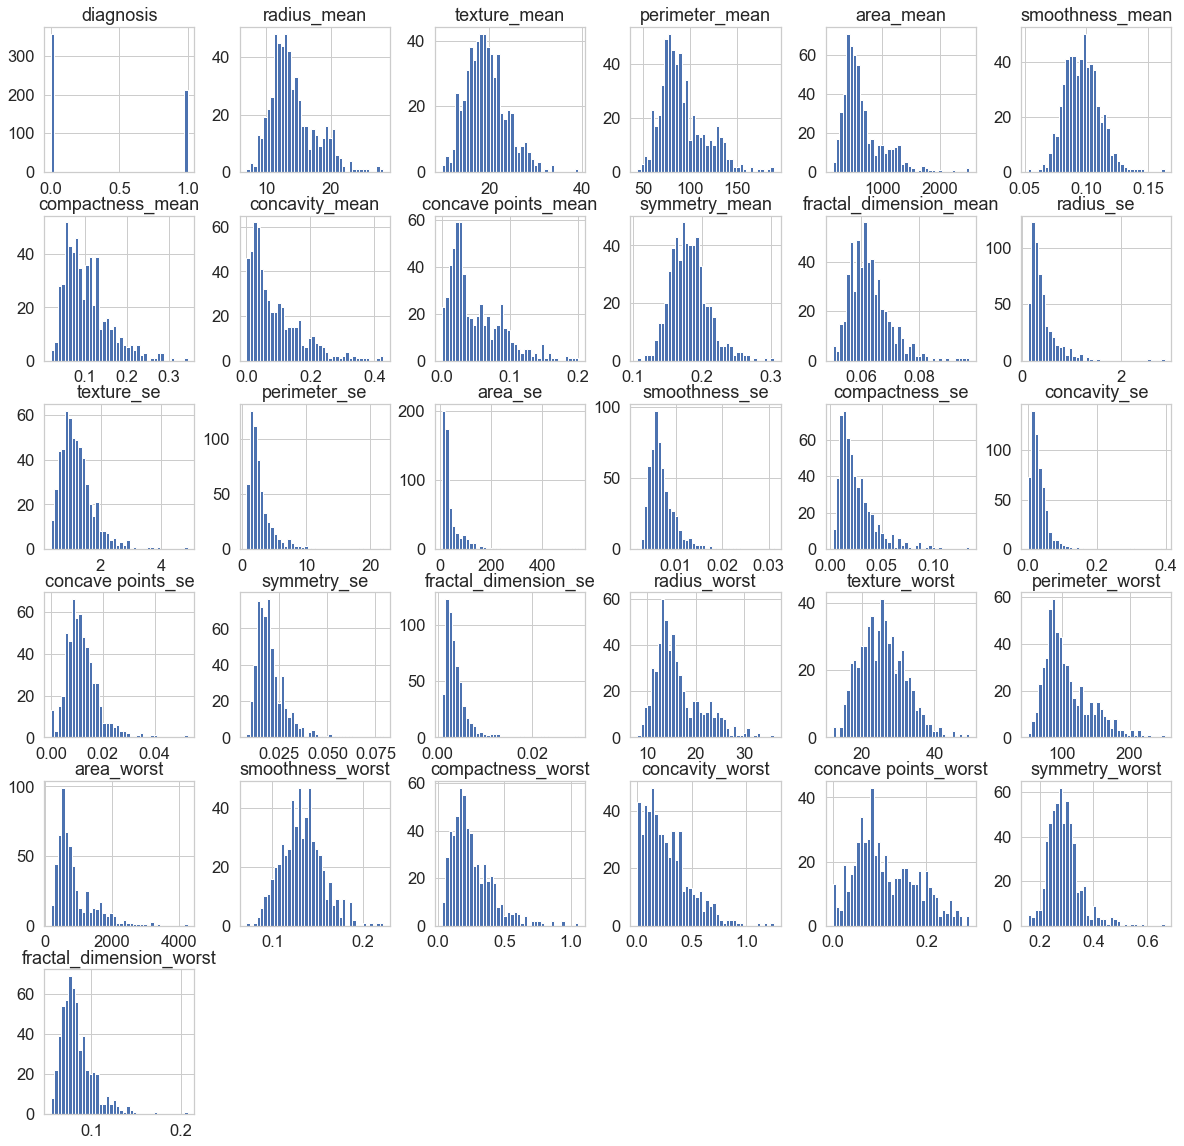

In [104]:
df.hist(bins = 40, figsize=(20.2, 20))
plt.show()

<Figure size 1440x864 with 0 Axes>

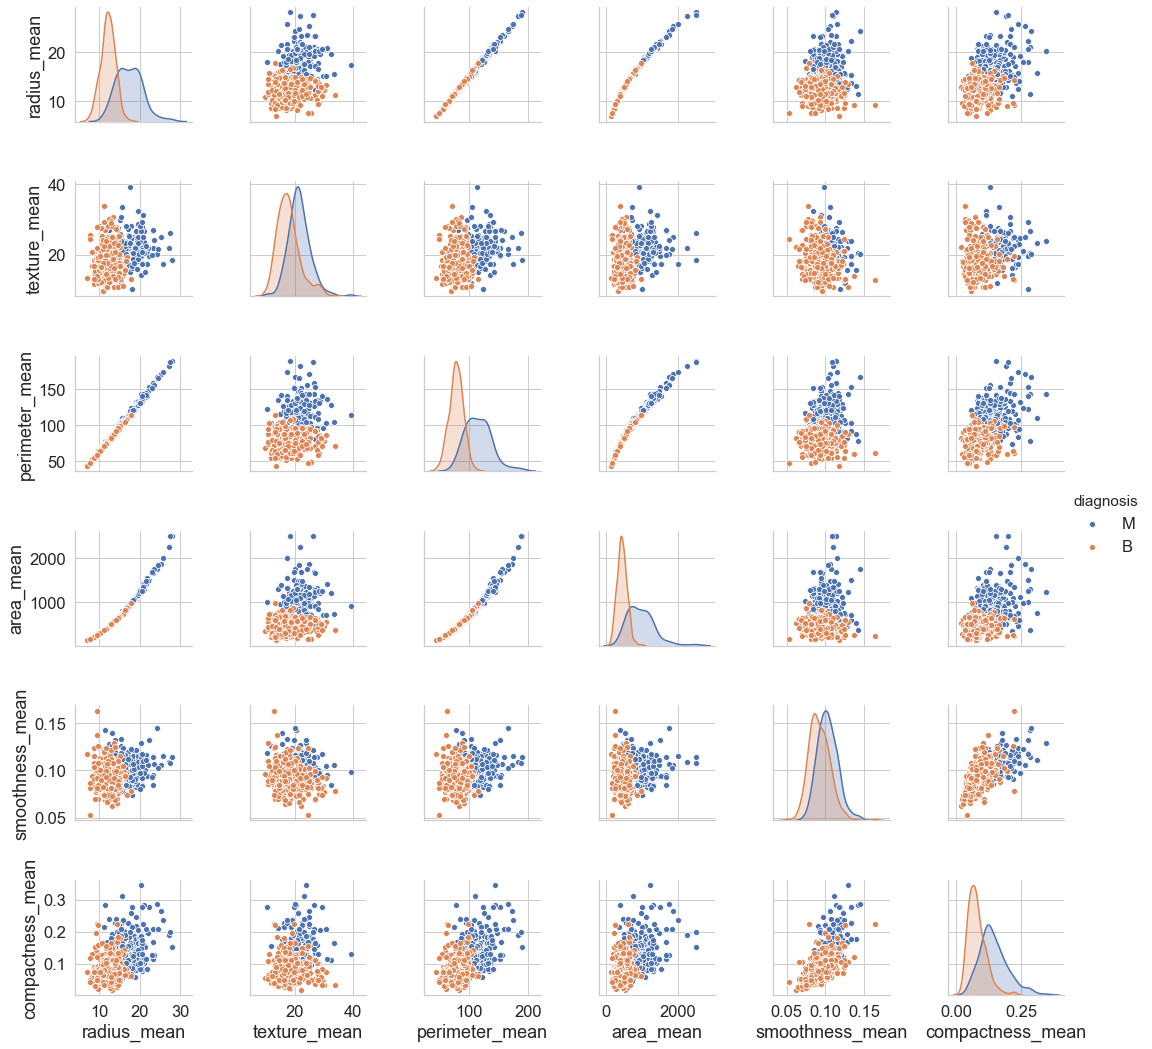

In [26]:
plt.figure(figsize=(20, 12))

ax = sns.pairplot(df, hue = 'diagnosis', 
             vars = ['radius_mean', 
                     'texture_mean', 
                     'perimeter_mean', 
                     'area_mean', 
                     'smoothness_mean', 
                     'compactness_mean']);

# Treino e teste

In [27]:
df.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [28]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
x = df.loc[:, ~df.columns.isin(["diagnosis"])]
y = df["diagnosis"]

In [30]:
x.shape

(569, 30)

In [31]:
y.shape

(569,)

# Treino e teste do modelo

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

In [33]:
x_train.shape

(284, 30)

In [34]:
y_train.shape

(284,)

In [35]:
x_test.shape

(285, 30)

In [36]:
y_test.shape

(285,)

# Modelo de machine learning

**Modelo de validação cruzada**

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_train, y_train, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [45.25, 70.86]


In [38]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_train, y_train, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [83.42, 98.99]


**Modelo Dummy Classifier**

In [41]:
from sklearn.dummy import DummyClassifier

model_dummy = DummyClassifier()
model_dummy_fit = model_dummy.fit(x_train, y_train)
model_dummy_scor = model_dummy.score(x_train, y_train)
print("Acurácia - Dummy Classifier: %.2f" % (model_dummy_scor * 100))

Acurácia - Dummy Classifier: 51.76


In [40]:
model_dummy_pred = model_dummy.predict(x_test)
model_dummy_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, model_dummy_pred)
print("Acurácia - Dummy Classifier: %.2f" % (accuracy * 100))

Acurácia - Dummy Classifier: 50.88


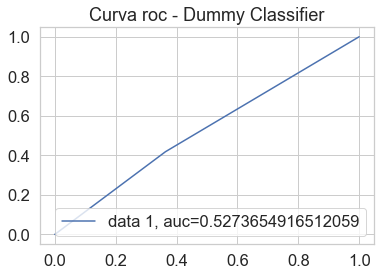

In [43]:
from sklearn import metrics

roc_g = model_dummy.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - Dummy Classifier")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix

matrix_confusion = confusion_matrix(y_test, model_dummy_pred)
matrix_confusion

array([[113,  74],
       [ 66,  32]], dtype=int64)

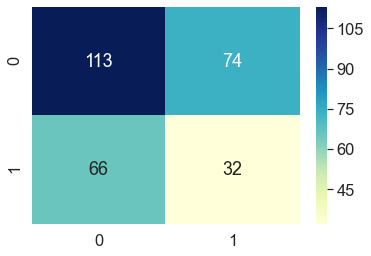

In [45]:
matrix = sns.heatmap(matrix_confusion, cmap = 'YlGnBu', annot = True, fmt='g')

In [46]:
from sklearn.metrics import classification_report

classification = classification_report(y_test, model_dummy_pred)
print("Modelo - Dummy Classifier")
print("\n")
print(classification)

Modelo - Dummy Classifier


              precision    recall  f1-score   support

           0       0.63      0.60      0.62       187
           1       0.30      0.33      0.31        98

    accuracy                           0.51       285
   macro avg       0.47      0.47      0.47       285
weighted avg       0.52      0.51      0.51       285



In [47]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Modelo - Dummy Classifier")
print("\n")
print("Precision - Dummy Classifier = {}".format(precision_score(y_test, model_dummy_pred, average='macro')))
print("Recall - Dummy Classifier = {}".format(recall_score(y_test, model_dummy_pred, average='macro')))
print("Accuracy - Dummy Classifier = {}".format(accuracy_score(y_test, model_dummy_pred)))
print("F1 Score - Dummy Classifier = {}".format(f1_score(y_test, model_dummy_pred, average='macro')))

Modelo - Dummy Classifier


Precision - Dummy Classifier = 0.46658585432697375
Recall - Dummy Classifier = 0.465404343555604
Accuracy - Dummy Classifier = 0.5087719298245614
F1 Score - Dummy Classifier = 0.4656059144969462


**Modelo Regressão logistica**

In [48]:
from sklearn.linear_model import LogisticRegression

model_regression_logistic = LogisticRegression()
model_regression_logistic_fit = model_regression_logistic.fit(x_train, y_train)
model_regression_logistic_scor = model_regression_logistic.score(x_train, y_train)
print("Model - Logistic Regression: %.2f" % (model_regression_logistic_scor * 100))

Model - Logistic Regression: 92.96


In [51]:
# Previsão 

model_regression_logistic_pred = model_regression_logistic.predict(x_test)
model_regression_logistic_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [52]:
accuracy = accuracy_score(y_test, model_regression_logistic_pred)
print("Acurácia - Logistic Regression: %.2f" % (accuracy * 100))

Acurácia - Logistic Regression: 95.09


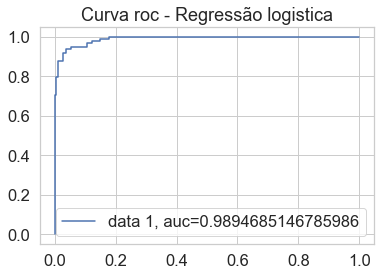

In [53]:
roc_g = model_regression_logistic.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - Regressão logistica")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

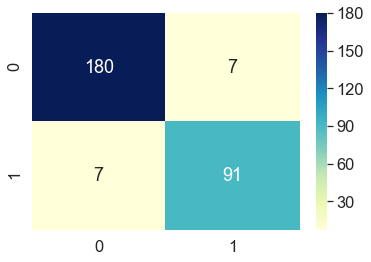

In [54]:
matrix = confusion_matrix(y_test, model_regression_logistic_pred)
matrix = sns.heatmap(matrix, cmap = 'YlGnBu', annot = True, fmt='g')

In [55]:
from sklearn.metrics import classification_report

classification = classification_report(y_test, model_regression_logistic_pred)
print("Modelo - Regressão logistica")
print("\n")
print(classification)

Modelo - Regressão logistica


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       187
           1       0.93      0.93      0.93        98

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.95      0.95      0.95       285



In [56]:
print("Modelo - Regressão logística")
print("\n")
print("Precision - Regressão logística = {}".format(precision_score(y_test, model_regression_logistic_pred, average='macro')))
print("Recall - Regressão logística = {}".format(recall_score(y_test, model_regression_logistic_pred, average='macro')))
print("Accuracy - Regressão logística = {}".format(accuracy_score(y_test, model_regression_logistic_pred)))
print("F1 Score - Regressão logística = {}".format(f1_score(y_test, model_regression_logistic_pred, average='macro')))

Modelo - Regressão logística


Precision - Regressão logística = 0.9455691367456074
Recall - Regressão logística = 0.9455691367456074
Accuracy - Regressão logística = 0.9508771929824561
F1 Score - Regressão logística = 0.9455691367456074


**Modelo Decision Tree Classifier**

In [57]:
from sklearn.tree import DecisionTreeClassifier

modelo_arvore_cla_1 = DecisionTreeClassifier(max_depth = 3)
modelo_arvore_cla_fit = modelo_arvore_cla_1.fit(x_train, y_train)
modelo_arvore_scor = modelo_arvore_cla_1.score(x_train, y_train)

print("Modelo - Decision Tree Classifier: %.2f" % (modelo_arvore_scor * 100))

Modelo - Decision Tree Classifier: 97.18


In [58]:
modelo_arvore_pred = modelo_arvore_cla_1.predict(x_train)
modelo_arvore_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

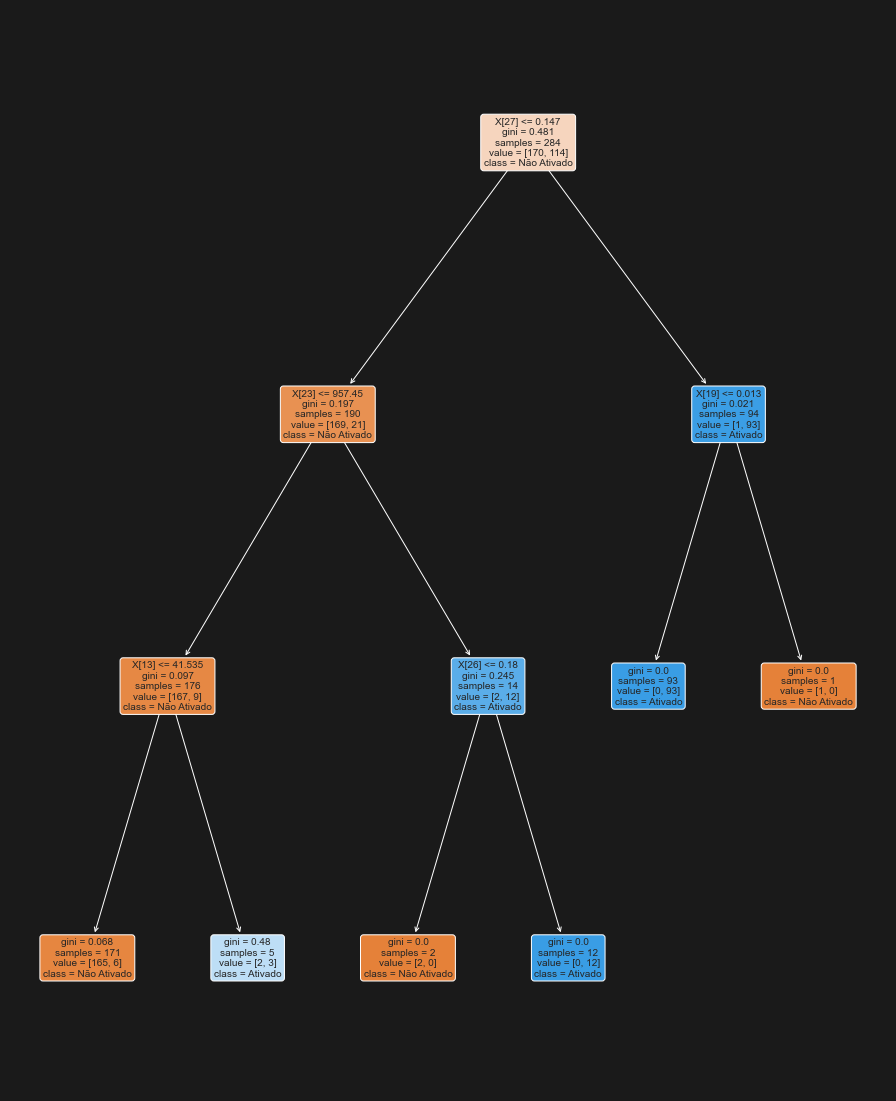

In [59]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15.8, 20), facecolor = "k")
tree.plot_tree(modelo_arvore_cla_1, 
               ax = ax, 
               fontsize = 10, 
               rounded = True, 
               filled = True, 
               class_names = ["Não Ativado", "Ativado"])
plt.show()

**Modelo 01 Decision Tree - Com overfitting**

In [61]:
modelo_arvore = DecisionTreeClassifier()
modelo_arvore_fit = modelo_arvore.fit(x_train, y_train)
modelo_arvore_pred = modelo_arvore.predict(x_train)
modelo_arvore_scor = modelo_arvore.score(x_train, y_train)
print("Modelo - Decision Tree Classifier: %.2f" % (modelo_arvore_scor * 100))

Modelo - Decision Tree Classifier: 100.00


In [62]:
modelo_arvore_pred1 = modelo_arvore.predict(x_test)
modelo_arvore_pred1

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [63]:
acuracia = metrics.accuracy_score(y_test, modelo_arvore_pred1)

print("Acuracia - Decision Tree: %.2f" % (acuracia * 100))

Acuracia - Decision Tree: 92.98


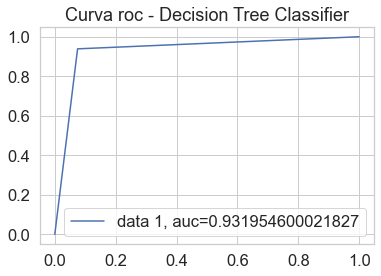

In [64]:
roc_g = modelo_arvore.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - Decision Tree Classifier")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

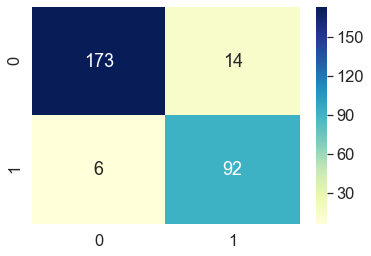

In [65]:
matrix = confusion_matrix(y_test, modelo_arvore_pred1)
matrix = sns.heatmap(matrix, cmap = 'YlGnBu', annot = True, fmt='g')

In [66]:
class_report = classification_report(y_train, modelo_arvore_pred)
print("Modelo - Decision Tree")
print("\n")
print(class_report)

Modelo - Decision Tree


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       114

    accuracy                           1.00       284
   macro avg       1.00      1.00      1.00       284
weighted avg       1.00      1.00      1.00       284



In [67]:
print("Modelo - Decision Tree")
print("\n")
print("Precision - Decision Tree = {}".format(precision_score(y_test, modelo_arvore_pred1, average='macro')))
print("Recall - Decision Tree = {}".format(recall_score(y_test, modelo_arvore_pred1, average='macro')))
print("Accuracy - Decision Tree = {}".format(accuracy_score(y_test, modelo_arvore_pred1)))
print("F1 Score - Decision Tree = {}".format(f1_score(y_test, modelo_arvore_pred1, average='macro')))

Modelo - Decision Tree


Precision - Decision Tree = 0.9172024876146305
Recall - Decision Tree = 0.931954600021827
Accuracy - Decision Tree = 0.9298245614035088
F1 Score - Decision Tree = 0.9236579877852782


# Validação cruzada

In [68]:
from sklearn.model_selection import cross_validate

results = cross_validate(modelo_arvore, 
                         x_train, 
                         y_train, 
                         cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

print(f"Mean train score {np.mean(results['train_score']):.2f}")
print(f"Mean test score {np.mean(results['test_score']):.2f}")

Mean train score 1.00
Mean test score 0.92


In [98]:
from sklearn.model_selection import GridSearchCV

parametros = {
  "max_depth" : [3, 5],
  "min_samples_split" : [32, 64, 128],
  "min_samples_leaf" : [32, 64, 128],
  "criterion" : ["gini", "entropy"]
}

modelo_arvore_cla = DecisionTreeClassifier()
DTCG = GridSearchCV(modelo_arvore_cla, parametros, cv = 5, return_train_score = True, scoring = "accuracy")
grid_fit = DTCG.fit(x, y)
results_GridSearchCV = grid_fit.cv_results_
parametros = grid_fit.best_index_
grid_pred = DTCG.predict(x_train)

print(f"Mean train score {results_GridSearchCV['mean_train_score'][parametros]:.2f}")
print(f"mean test score {results_GridSearchCV['mean_test_score'][parametros]:.2f}")
results_GridSearchCV["params"][parametros]
print("\n")      
acuracia = metrics.accuracy_score(y_train, grid_pred)
print("Acuracia - GridSearchCV: %.2f" % (acuracia * 100))

Mean train score 0.94
mean test score 0.92


Acuracia - GridSearchCV: 93.66


In [94]:
SEED = 123456

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

parametros = {
    "max_depth" : randint(1, 10),
    "min_samples_split" : randint(32, 129),
    "min_samples_leaf" : randint(32, 129),
    "criterion" : ["gini", "entropy"]
}

modelo_arvore_cla = DecisionTreeClassifier()
DTC = RandomizedSearchCV(modelo_arvore_cla, parametros, random_state=SEED, cv=5, return_train_score=True, n_iter=10, scoring='accuracy')
RandomizedSearchCV_fit = DTC.fit(x_train, y_train)
pred_randomized_search_cv = DTC.predict(x_train)
results_RandomizedSearchCV = RandomizedSearchCV_fit.cv_results_
parametros = RandomizedSearchCV_fit.best_index_

modelo_arvore_cla = DecisionTreeClassifier()
modelo_arvore_cla_fit = modelo_arvore_cla.fit(x_train, y_train)
modelo_arvore_cla_pred = modelo_arvore_cla.predict(x_test)


print("Parametros - RandomizedSearchCV:", parametros)
print("\n")

print(f"Mean Train Score {results_RandomizedSearchCV['mean_train_score'][parametros]:.2f}")
print(f"Mean Test Score {results_RandomizedSearchCV['mean_test_score'][parametros]:.2f}")
print("\n")
      
resut = results_RandomizedSearchCV['params'][parametros]
print(resut)
print("\n")
      
acuracia = metrics.accuracy_score(y_train, pred_randomized_search_cv)
print("Acuracia - Randomized search cv: %.2f" % (acuracia * 100))

Parametros - RandomizedSearchCV: 2


Mean Train Score 0.92
Mean Test Score 0.90


{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 79, 'min_samples_split': 82}


Acuracia - Randomized search cv: 92.25


# Resultados 

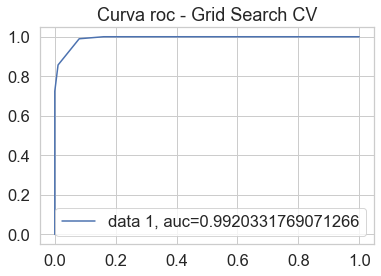

In [72]:
roc_g = DTCG.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - Grid Search CV")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

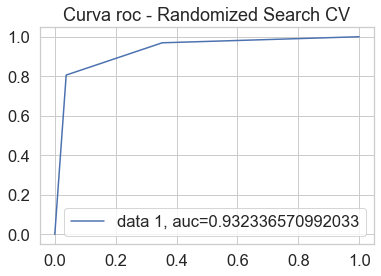

In [73]:
roc_g = DTC.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.title("Curva roc - Randomized Search CV")
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

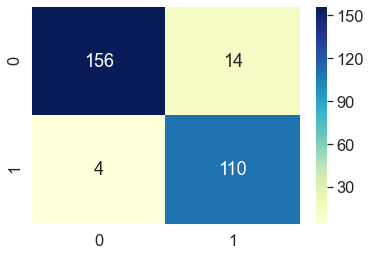

In [74]:
matrix = confusion_matrix(y_train, grid_pred)
matrix = sns.heatmap(matrix, cmap = 'YlGnBu', annot = True, fmt='g')

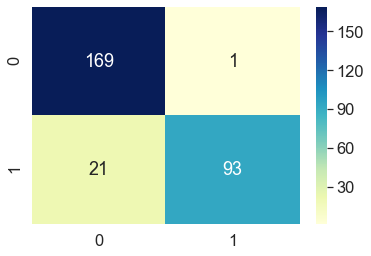

In [75]:
matrix = confusion_matrix(y_train, pred_randomized_search_cv)
matrix = sns.heatmap(matrix, cmap = 'YlGnBu', annot = True, fmt='g')

In [101]:
print("GridSearchCV")
print("\n")
print(classification_report(y_train, grid_pred))

print("RandomizedSearchCV")
print("\n")
print(classification_report(y_train, pred_randomized_search_cv))

print("Decision Tree")
print("\n")
print(classification_report(y_train, modelo_arvore_cla_pred))

GridSearchCV


              precision    recall  f1-score   support

           0       0.97      0.92      0.95       170
           1       0.89      0.96      0.92       114

    accuracy                           0.94       284
   macro avg       0.93      0.94      0.93       284
weighted avg       0.94      0.94      0.94       284

RandomizedSearchCV


              precision    recall  f1-score   support

           0       0.89      0.99      0.94       170
           1       0.99      0.82      0.89       114

    accuracy                           0.92       284
   macro avg       0.94      0.90      0.92       284
weighted avg       0.93      0.92      0.92       284

Decision Tree


              precision    recall  f1-score   support

           0       0.97      0.91      0.94       187
           1       0.85      0.94      0.89        98

    accuracy                           0.92       285
   macro avg       0.91      0.93      0.92       285
weighted avg       0.9

In [103]:
print("Modelo - GridSearchCV")
print("Precision - Decision Tree = {}".format(precision_score(y_train, pred_randomized_search_cv, average='macro')))
print("Recall - Decision Tree = {}".format(recall_score(y_train, pred_randomized_search_cv, average='macro')))
print("Accuracy - Decision Tree = {}".format(accuracy_score(y_train, pred_randomized_search_cv)))
print("F1 Score - Decision Tree = {}".format(f1_score(y_train, pred_randomized_search_cv, average='macro')))
print("\n")

print("Modelo - Randomized SearchCV")
print("Precision - Decision Tree = {}".format(precision_score(y_train, pred_randomized_search_cv, average='macro')))
print("Recall - Decision Tree = {}".format(recall_score(y_train, pred_randomized_search_cv, average='macro')))
print("Accuracy - Decision Tree = {}".format(accuracy_score(y_train, pred_randomized_search_cv)))
print("F1 Score - Decision Tree = {}".format(f1_score(y_train, pred_randomized_search_cv, average='macro')))

print("Modelo - Dummy Classifier")
print("\n")
print("Precision - Dummy Classifier = {}".format(precision_score(y_test, model_dummy_pred, average='macro')))
print("Recall - Dummy Classifier = {}".format(recall_score(y_test, model_dummy_pred, average='macro')))
print("Accuracy - Dummy Classifier = {}".format(accuracy_score(y_test, model_dummy_pred)))
print("F1 Score - Dummy Classifier = {}".format(f1_score(y_test, model_dummy_pred, average='macro')))

print("\n")
print("Modelo - Regressão logística")
print("Precision - Regressão logística = {}".format(precision_score(y_test, model_regression_logistic_pred, average='macro')))
print("Recall - Regressão logística = {}".format(recall_score(y_test, model_regression_logistic_pred, average='macro')))
print("Accuracy - Regressão logística = {}".format(accuracy_score(y_test, model_regression_logistic_pred)))
print("F1 Score - Regressão logística = {}".format(f1_score(y_test, model_regression_logistic_pred, average='macro')))

print("\n")
print("Modelo - Decision Tree")
print("Precision - Decision Tree = {}".format(precision_score(y_test, modelo_arvore_cla_pred, average='macro')))
print("Recall - Decision Tree = {}".format(recall_score(y_test, modelo_arvore_cla_pred, average='macro')))
print("Accuracy - Decision Tree = {}".format(accuracy_score(y_test, modelo_arvore_cla_pred)))
print("F1 Score - Decision Tree = {}".format(f1_score(y_test, modelo_arvore_cla_pred, average='macro')))

Modelo - GridSearchCV
Precision - Decision Tree = 0.939417693169093
Recall - Decision Tree = 0.9049535603715171
Accuracy - Decision Tree = 0.9225352112676056
F1 Score - Decision Tree = 0.9165598290598291


Modelo - Randomized SearchCV
Precision - Decision Tree = 0.939417693169093
Recall - Decision Tree = 0.9049535603715171
Accuracy - Decision Tree = 0.9225352112676056
F1 Score - Decision Tree = 0.9165598290598291
Modelo - Dummy Classifier


Precision - Dummy Classifier = 0.46658585432697375
Recall - Dummy Classifier = 0.465404343555604
Accuracy - Dummy Classifier = 0.5087719298245614
F1 Score - Dummy Classifier = 0.4656059144969462


Modelo - Regressão logística
Precision - Regressão logística = 0.9455691367456074
Recall - Regressão logística = 0.9455691367456074
Accuracy - Regressão logística = 0.9508771929824561
F1 Score - Regressão logística = 0.9455691367456074


Modelo - Decision Tree
Precision - Decision Tree = 0.908976773383553
Recall - Decision Tree = 0.9266070064389392
Accurac

# Salvando o modelo M.L

In [82]:
import pickle
    
with open('modelo_arvore_pred.pkl', 'wb') as file:
    pickle.dump(modelo_arvore_pred, file)
    
with open('model_logistic_reg_pred.pkl', 'wb') as file:
    pickle.dump(model_logistic_reg_pred, file)
    
with open('pred_randomized_search_cv.pkl', 'wb') as file:
    pickle.dump(pred_randomized_search_cv, file) 

NameError: name 'model_logistic_reg_pred' is not defined